In [2]:
!git clone https://github.com/Ndibe-E/face-mask-ai.git

Cloning into 'face-mask-ai'...
remote: Enumerating objects: 11869, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 11869 (delta 13), reused 12 (delta 1), pack-reused 11838 (from 1)
Receiving objects: 100% (11869/11869), 987.21 MiB | 16.54 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Updating files: 100% (4570/4570), done.


In [3]:
import os
os.chdir("face-mask-ai")
print(os.getcwd())

/content/face-mask-ai


In [4]:
# importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [5]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

In [6]:
TRAIN_DIR = "Face Mask dataset"

In [7]:
# defining instance
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [8]:
# creating train set
train_set = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

Found 3648 images belonging to 3 classes.


In [9]:
# creating test set
test_set = datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)


Found 911 images belonging to 3 classes.


In [10]:
# checking the values of labels
print(train_set.class_indices)

{'Correct': 0, 'Incorrect': 1, 'NoMask': 2}


USING MOBLIENETV2 Instead of CNN

In [11]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [12]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(3, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [13]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [14]:
history = model.fit(
    train_set,
    epochs=EPOCHS,
    validation_data=test_set
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 97s 696ms/step - accuracy: 0.7869 - loss: 0.5629 - val_accuracy: 0.8749 - val_loss: 0.3239
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 64s 566ms/step - accuracy: 0.9574 - loss: 0.1388 - val_accuracy: 0.8946 - val_loss: 0.2571
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 65s 565ms/step - accuracy: 0.9742 - loss: 0.0816 - val_accuracy: 0.9319 - val_loss: 0.1956
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 64s 562ms/step - accuracy: 0.9768 - loss: 0.0788 - val_accuracy: 0.9385 - val_loss: 0.1716
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 64s 564ms/step - accuracy: 0.9831 - loss: 0.0589 - val_accuracy: 0.9418 - val_loss: 0.1671
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 64s 563ms/step - accuracy: 0.9822 - loss: 0.0572 - val_accuracy: 0.9561 - val_loss: 0.1136
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 64s 565ms/step - accuracy: 0.9858 - loss: 0.0471 - val_accuracy: 0.9627 - val_loss: 0.1122
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 64s 559ms/step - accuracy: 0.9854 - loss: 0

In [15]:
test_loss, test_acc = model.evaluate(test_set)
print(f"Accuracy: {test_acc:.4f}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 551ms/step - accuracy: 0.9540 - loss: 0.1279
Accuracy: 0.9407


In [16]:
# a classification report of the model built
y_true = test_set.classes

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred))

29/29 ━━━━━━━━━━━━━━━━━━━━ 24s 683ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       311
           1       0.99      0.89      0.94       300
           2       0.91      1.00      0.95       300

    accuracy                           0.95       911
   macro avg       0.95      0.95      0.95       911
weighted avg       0.95      0.95      0.95       911



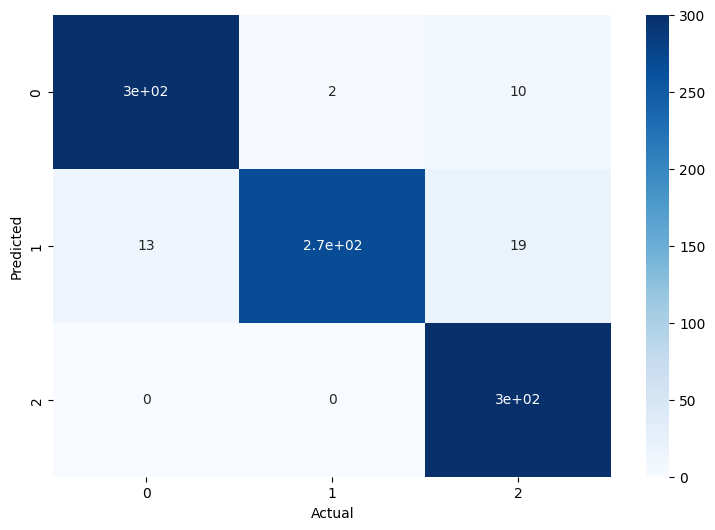

In [17]:
# A confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [18]:
#Extracts a batch of test_set images
images, labels = next(test_set)

In [19]:
predictions = model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [20]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(labels, axis=1)

In [21]:
class_names = list(train_set.class_indices.keys())
print(class_names)

['Correct', 'Incorrect', 'NoMask']


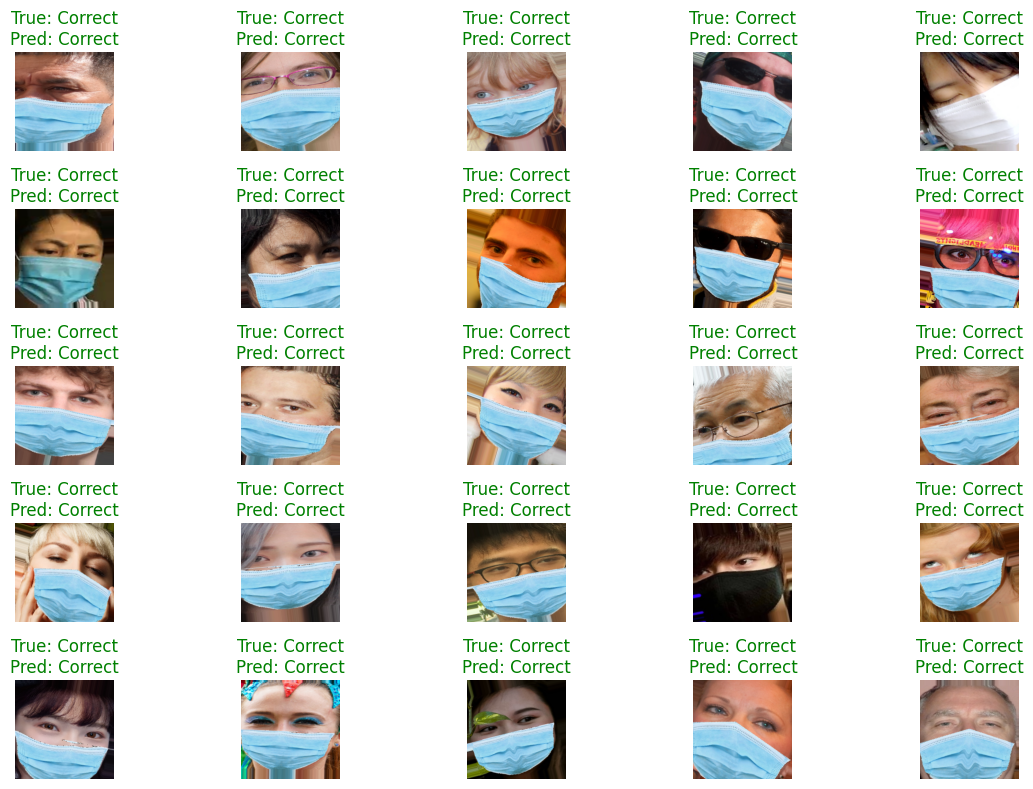

In [28]:
plt.figure(figsize=(12, 8))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.axis("off")

    true_label = class_names[true_classes[i]]
    predicted_label = class_names[predicted_classes[i]]

    title_color = "green" if true_label == predicted_label else "red"
    plt.title(f"True: {true_label}\nPred: {predicted_label}", color=title_color)

plt.tight_layout()
plt.show()

In [23]:
# model.save("model.keras")

In [24]:
# import os
# os.path.exists("model.h5")

True

In [26]:
# from google.colab import files
# files.download("model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>